# Airbnb Ratings - How To Get a Perfect 10

## Gathering the Data

First thing's first: gathering the data. Let's import our necessary libraries and load in our data. 

In [2]:
#Import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load Airbnb data from filepath
filepath = '/Users/osheiza/Desktop/Data_Science_Nanodegree/airbnb_blog_post'

seattle_calendar = pd.read_csv(f'{filepath}' + "/seattle_airbnb/calendar.csv")
seattle_listings = pd.read_csv(f'{filepath}' + "/seattle_airbnb/listings.csv")
seattle_reviews = pd.read_csv(f'{filepath}' + "/seattle_airbnb/reviews.csv")

In [3]:
#Take a look at what each of the dataframes look like
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
seattle_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Assessing the Data

### Calendar

We're first going to check the **calendar** dataframe a little more closely. Based on our original look about it looks like there are two unique values for the 'available' column: t (true) and f (false). It also looks like only the listings that are available have prices listed. Let's confirm this is true.

In [6]:
#If we only look at available listings, the sum of nulls should equal 0.
seattle_calendar[seattle_calendar["available"] == 't'].isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

Looks good! We will clean up the "available" column and do some aggregations later on.

### Listings

Let's take a look at the **listings** dataframe now, which happens to be our largest dataframe with the bulk of the data.

In [7]:
seattle_listings.shape[0]

3818

In [8]:
seattle_listings.shape[1]

92

The **listings** dataframe has 3818 rows and 90 columns.

We should also look at which columns are categorial and numerical.

In [9]:
cat_cols = [col for col in seattle_listings.select_dtypes(include="object").columns]
num_cols = [col for col in seattle_listings.select_dtypes(exclude="object").columns]

In [10]:
len(cat_cols)

62

Looks like we have 62 categorical columns and 30 numerical columns. 

In [11]:
#Let's determine how much of our data is missing and what we want to do with those missing values
cols_with_nulls = [col for col in seattle_listings.columns if seattle_listings[col].isnull().sum() > 0]
len(cols_with_nulls)

45

That's a lot of columns! Half of the columns in our dataset have at least 1 missing value. Naturally, some of these columns won't be necessary for our subsequent analysis, so they will be excluded altogether. It's also possible that only a small number of data is missing so we could drop individual rows instead of columns. Let's look closer and decide what we need to do the columns we *do* want to keep.

In [12]:
missing_columns = set(seattle_listings.columns[np.sum(seattle_listings.isnull())/seattle_listings.shape[0] > 0.50])
missing_columns

{'license', 'monthly_price', 'security_deposit', 'square_feet'}

Only 4 columns have over 50% of values that are missing. The "license" column doesn't seem to be important enough for answering the questions we might have; "square_feet" might be helpful in predicting price but we have other proxies like the number of bedrooms and bathrooms, so we will just go ahead and exclude both columns.

There are some columns in here that could be pretty important, like 'review_scores_rating', 'host_response_rate', or property_type.

In [13]:
#Get the percentage of missing values for each column
percent_missing = seattle_listings.isnull().sum()/len(seattle_listings)

In [14]:
#Sort the percentages in descending order to show which columns have the most missing
percent_missing.sort_values(ascending=False)[:45]

license                        1.000000
square_feet                    0.974594
monthly_price                  0.602672
security_deposit               0.511262
weekly_price                   0.473808
notes                          0.420639
neighborhood_overview          0.270299
cleaning_fee                   0.269775
transit                        0.244631
host_about                     0.224987
host_acceptance_rate           0.202462
review_scores_accuracy         0.172342
review_scores_checkin          0.172342
review_scores_value            0.171818
review_scores_location         0.171556
review_scores_cleanliness      0.171032
review_scores_communication    0.170508
review_scores_rating           0.169460
last_review                    0.164222
first_review                   0.164222
reviews_per_month              0.164222
space                          0.149031
host_response_rate             0.136983
host_response_time             0.136983
neighbourhood                  0.108958


Another thing we want to check for is columns that don't really add value to our data.  I noticed that the "experiences_offered" column only has one value throughout the dataset: "none". Since this doesn't add any additional information, we'll want to exclude these when we clean our data.  Let's see if we can eliminate more columns which only contain one value.

In [15]:
cols_with_one_value = [col for col in seattle_listings.columns if seattle_listings[col].nunique() == 1]
cols_with_one_value

['scrape_id',
 'last_scraped',
 'experiences_offered',
 'market',
 'country_code',
 'country',
 'has_availability',
 'calendar_last_scraped',
 'requires_license',
 'jurisdiction_names']

### Reviews

Last but not least, let's see what's missing from reviews.

In [16]:
seattle_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

Of the 84,849 rows we have in the review dataset, only 18 comments are missing. We'll drop these rows in the cleaning data section.

## Cleaning the Data

### Calendar

In [17]:
#Let's convert 'available' to numerical values. We will use this to calculate occupancy rates later.
seattle_calendar["available"] = np.where(seattle_calendar["available"] == 'f', 0, 1).astype(int)

#Turn price into numeric column.
seattle_calendar["price"] = seattle_calendar["price"].replace('[\$,]', '', regex=True).astype(float)

seattle_calendar

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,0,NaN
1393566,10208623,2016-12-30,0,NaN
1393567,10208623,2016-12-31,0,NaN
1393568,10208623,2017-01-01,0,NaN


In [18]:
calendar_agg = seattle_calendar.groupby("listing_id").agg({
    "price": "mean",
    "available": "mean"
})

### Listings

We have a lot of missing data in this dataset! Based on our assessment done above, we have decided to exclude:
- any columns with >= 50% of values missing
- any column with only 1 unique value

Some columns have close to 50% of values missing, and these will be excluded as well.There are also many columns associated with scores. In a later analysis, I will look at if we can predict scores based on comments, but until then we will also exclude these columns. Let's see what our dataset looks like now.

In [19]:
#Drop columns we know we won't use
cols_to_drop = ['license', 'monthly_price', 'security_deposit', 'square_feet', 'weekly_price', 'notes', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_value', 
                'review_scores_location', 'review_scores_cleanliness', 'review_scores_communication']
cols_to_drop.extend(cols_with_one_value)
listings = seattle_listings.drop(cols_to_drop, axis=1)

Let's take another look to see what we have eliminated.

In [20]:
percent_missing = listings.isnull().sum()/len(listings)
percent_missing.sort_values(ascending=False)[:20]

neighborhood_overview    0.270299
cleaning_fee             0.269775
transit                  0.244631
host_about               0.224987
host_acceptance_rate     0.202462
review_scores_rating     0.169460
first_review             0.164222
last_review              0.164222
reviews_per_month        0.164222
space                    0.149031
host_response_rate       0.136983
host_response_time       0.136983
neighbourhood            0.108958
medium_url               0.083814
thumbnail_url            0.083814
xl_picture_url           0.083814
host_neighbourhood       0.078575
summary                  0.046359
bathrooms                0.004191
host_location            0.002095
dtype: float64

We can also remove the "url" columns as well as the the neighborhood_overview columns. Many of these categorical columns are long descriptions as well, so for this iteration we will exclude these columns. (Part 3 of this series will focus on NLP, so these will eventually be useful!)

For all other columns where the percentage of missing values is very low, we will delete those individual rows. 

In [21]:
listings = listings.drop(["neighborhood_overview", "medium_url", "thumbnail_url", "xl_picture_url", "first_review", "last_review", "host_about", "space"], axis=1)

In [22]:
less_than_10_percent_missing = [col for col in listings.columns if listings[col].isnull().sum()/listings.shape[0] < 0.11]
listings = listings.dropna(subset=less_than_10_percent_missing, axis=0, how='any')

In [23]:
percent_missing = listings.isnull().sum()/len(listings)
percent_missing.sort_values(ascending=False)[:10]

cleaning_fee            0.263027
transit                 0.209360
host_acceptance_rate    0.200936
review_scores_rating    0.160998
reviews_per_month       0.156318
host_response_rate      0.139470
host_response_time      0.139470
amenities               0.000000
guests_included         0.000000
price                   0.000000
dtype: float64

For the remainder of these columns, we are going to impute values. This unfortunately will make our future model a little bit less reliable.

Before we do that, we still need to do some more cleaning! We have some columns with special characters ($, ., etc.) that need to be removed. We also need to convert our categorical values into something computers understand... numbers!

In [24]:
cols_to_change = [col for col in listings.columns if "rate" in col or "price" in col or "extra_people" in col]
cols_to_change

['host_response_rate', 'host_acceptance_rate', 'price', 'extra_people']

In [25]:
def make_numeric(data):
    '''
    For columns that should be numeric but include special characters (e.g. rates, price, etc.) remove the characters
    and convert column to float.
    '''
    cols_to_change = [col for col in listings.columns if "rate" in col or "price" in col or "extra_people" in col]
                      
    for col in cols_to_change:
        data[col] = data[col].replace('[\$,%]', '', regex=True).astype(float)
    
    return data

listings_cleaned = make_numeric(listings)

In [26]:
def impute_values(data):
    '''
    For missing data in categorical columns, we will impute the mode. For missing data in numerical columns, impute the mean.
    '''
    for col in data.columns:
        if data[col].dtypes == 'object':
            data[col].fillna(data[col].mode(), inplace=True)
        else:
            data[col].fillna(data[col].mean(), inplace=True)
    return data

listings_cleaned = impute_values(listings_cleaned)

In [27]:
listings_cleaned.head()

,id,listing_url,name,summary,description,transit,picture_url,host_id,host_url,host_name,...,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,953595,https://www.airbnb.com/rooms/953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,Chemically sensitive? We've removed the irrita...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,...,16,291,43,96.000000,f,strict,t,t,6,1.480000
2,3308979,https://www.airbnb.com/rooms/3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,New modern house built in 2013. Spectacular s...,A bus stop is just 2 blocks away. Easy bus a...,https://a2.muscache.com/ac/pictures/b4324e0f-a...,16708587,https://www.airbnb.com/users/show/16708587,Jill,...,17,220,20,97.000000,f,strict,f,f,2,1.150000
3,7421966,https://www.airbnb.com/rooms/7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,A charming apartment that sits atop Queen Anne...,NaN,https://a0.muscache.com/ac/pictures/94146944/6...,9851441,https://www.airbnb.com/users/show/9851441,Emily,...,0,143,0,94.663072,f,flexible,f,f,1,2.113876
4,278830,https://www.airbnb.com/rooms/278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,The nearest public transit bus (D Line) is 2 b...,https://a1.muscache.com/ac/pictures/6120468/b0...,1452570,https://www.airbnb.com/users/show/1452570,Emily,...,90,365,38,92.000000,f,strict,f,f,1,0.890000
5,5956968,https://www.airbnb.com/rooms/5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,We're renting out a small private unit of one ...,The #1 and #2 bus picks up 2-3 blocks away (di...,https://a2.muscache.com/ac/pictures/84791950/f...,326758,https://www.airbnb.com/users/show/326758,Andrew,...,27,302,17,95.000000,f,strict,f,f,1,2.450000


In [28]:
listings_cleaned.isnull().sum()

id                                  0
listing_url                         0
name                                0
summary                             0
description                         0
                                   ..
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
Length: 62, dtype: int64

### Reviews

As mentioned earlier, we are going to completely drop the missing comments from the reviews dataset. One thing we also need to check for is empty strings. We will drop those as well.

In [29]:
#Drop all NA comments
reviews = seattle_reviews.dropna()
reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [30]:
blanks = []

for index, listing, rid, date, viewier, name, comment in reviews.itertuples(): #This allows you to iterate over each row of the dataframe
    if type(comment) == str:     #If we hadn't already dropped NA values we would need this line to avoid NAs
        if comment.isspace():    #Check to see if the comment is whitespace aka blank
            blanks.append(index) #If it is add its index to the blanks list
blanks

[]

We didn't have any blanks in the reviews dataset! We are good to go! 

## Analyzing the Data

#### 1. What are the most popular types of properties listed in Seattle?

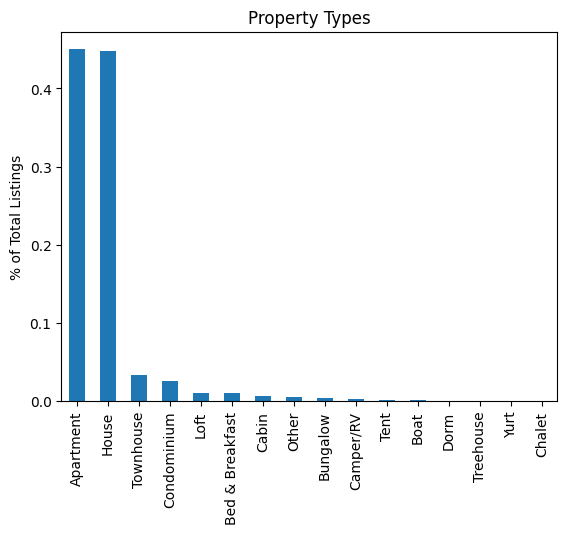

In [43]:
#Get how often each of the different property types appear in dataset and divide by number of rows to get percentage.
property_types = listings_cleaned["property_type"].value_counts()
(property_types/listings_cleaned.shape[0]).plot(kind="bar", title="Property Types").set(ylabel="% of Total Listings");


#### 2. Throughout the year what the overall occupancy rate? By property type? By neighborhood?

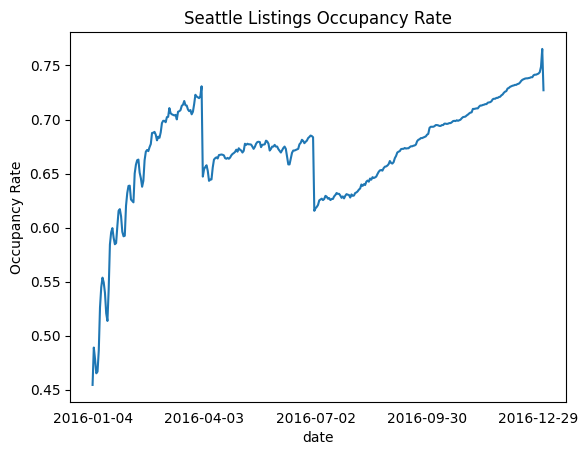

In [45]:
#What is the occupancy rate? How did that look by property type? Neighborhood?
calendar = pd.merge(seattle_calendar, listings[['id', 'property_type', 'neighbourhood_group_cleansed']], left_on=['listing_id'], right_on=['id'], how='left')
total_occupancy_rate = calendar.groupby('date')['available'].mean()

#Make seaborn line chart 
g = sns.lineplot(total_occupancy_rate)

#Only want to display quarterly dates to avoid clogging up x-axis
for index, label in enumerate(g.get_xticklabels()):
    if index % 90 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
g.set(title="Seattle Listings Occupancy Rate", ylabel='Occupancy Rate')
g.tick_params(bottom=False)

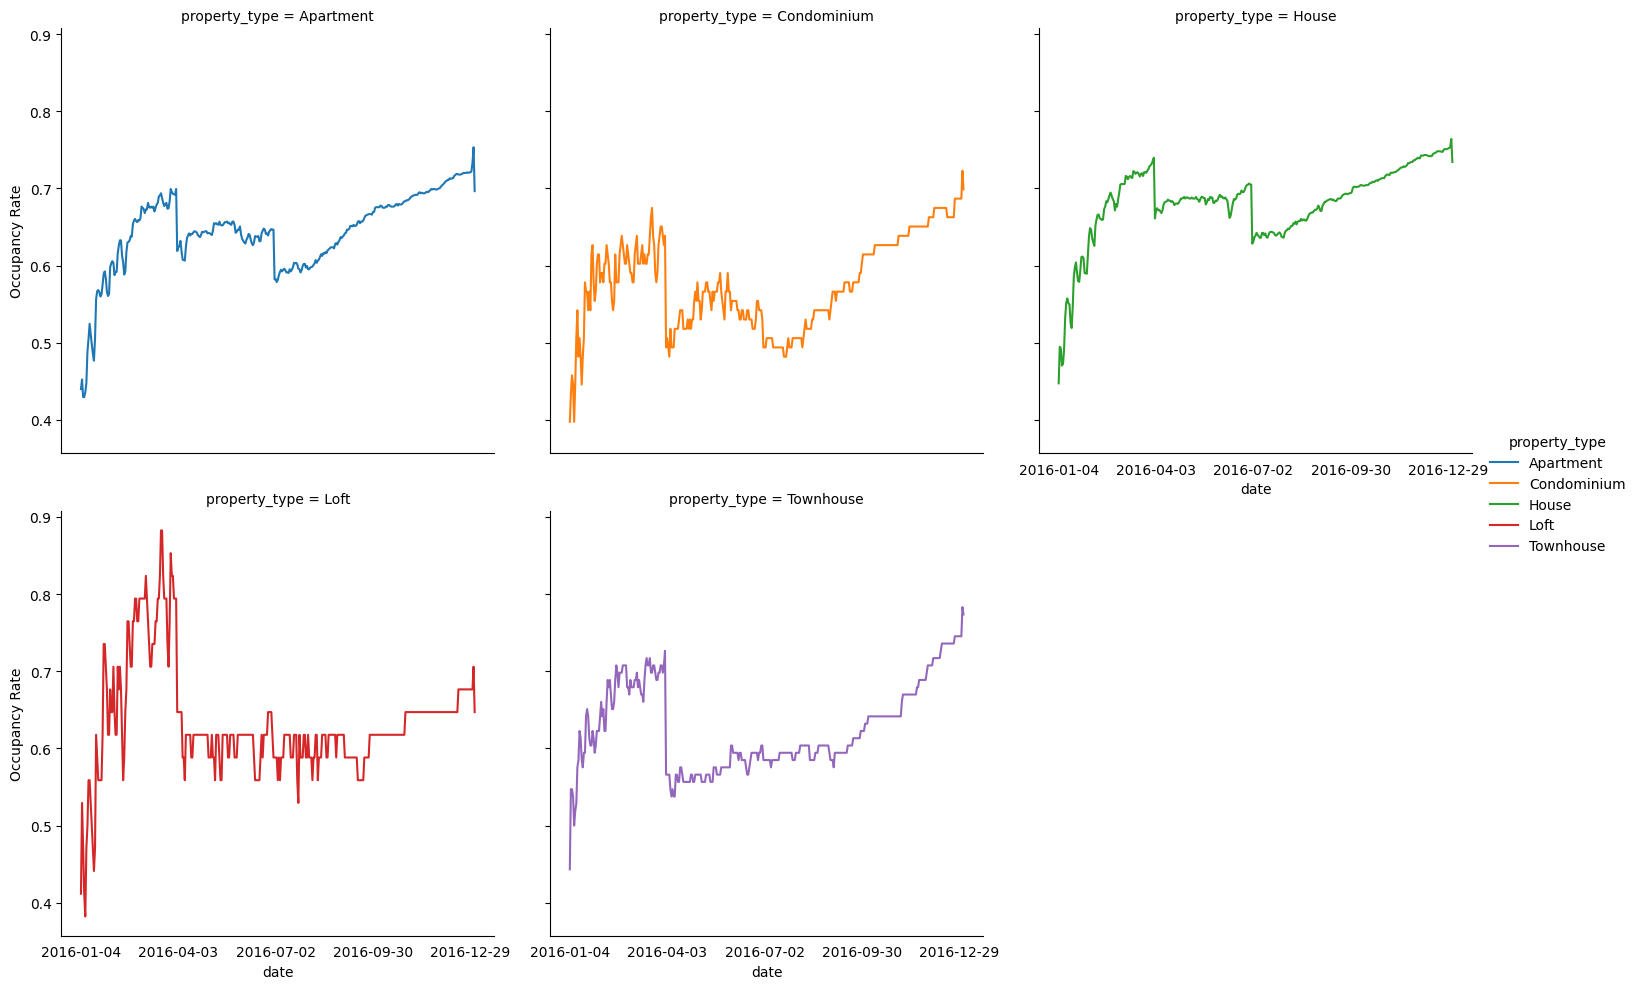

In [126]:
#Filter on top 5 properties and plot occupancy rate for each property type.
popular_properties = ['Apartment', 'House', 'Townhouse', 'Condominium', 'Loft']
top_5_property_types = calendar[calendar['property_type'].isin(popular_properties)] 
top_5_property_types = top_5_property_types.groupby(["date", 'property_type']).agg({
    "available": "mean"
})


g = sns.relplot(data=top_5_property_types, x="date", y="available", hue="property_type", kind="line", col="property_type", col_wrap = 3)
g.set(ylabel="Occupancy Rate")

#Making the graph look more presentable by only including quarterly labels
for ax in g.axes.flat:
    for index,label in enumerate(ax.get_xticklabels()):
        if index % 90 == 0: 
            label.set_visible(True)
        else:
            label.set_visible(False)

g.tick_params(bottom=False)

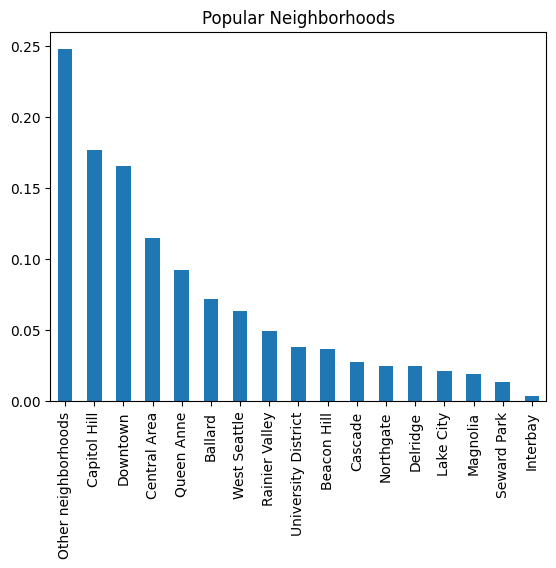

In [86]:
(neighborhood_vals/listings_cleaned.shape[0]).plot(kind="bar");
plt.title("Popular Neighborhoods");

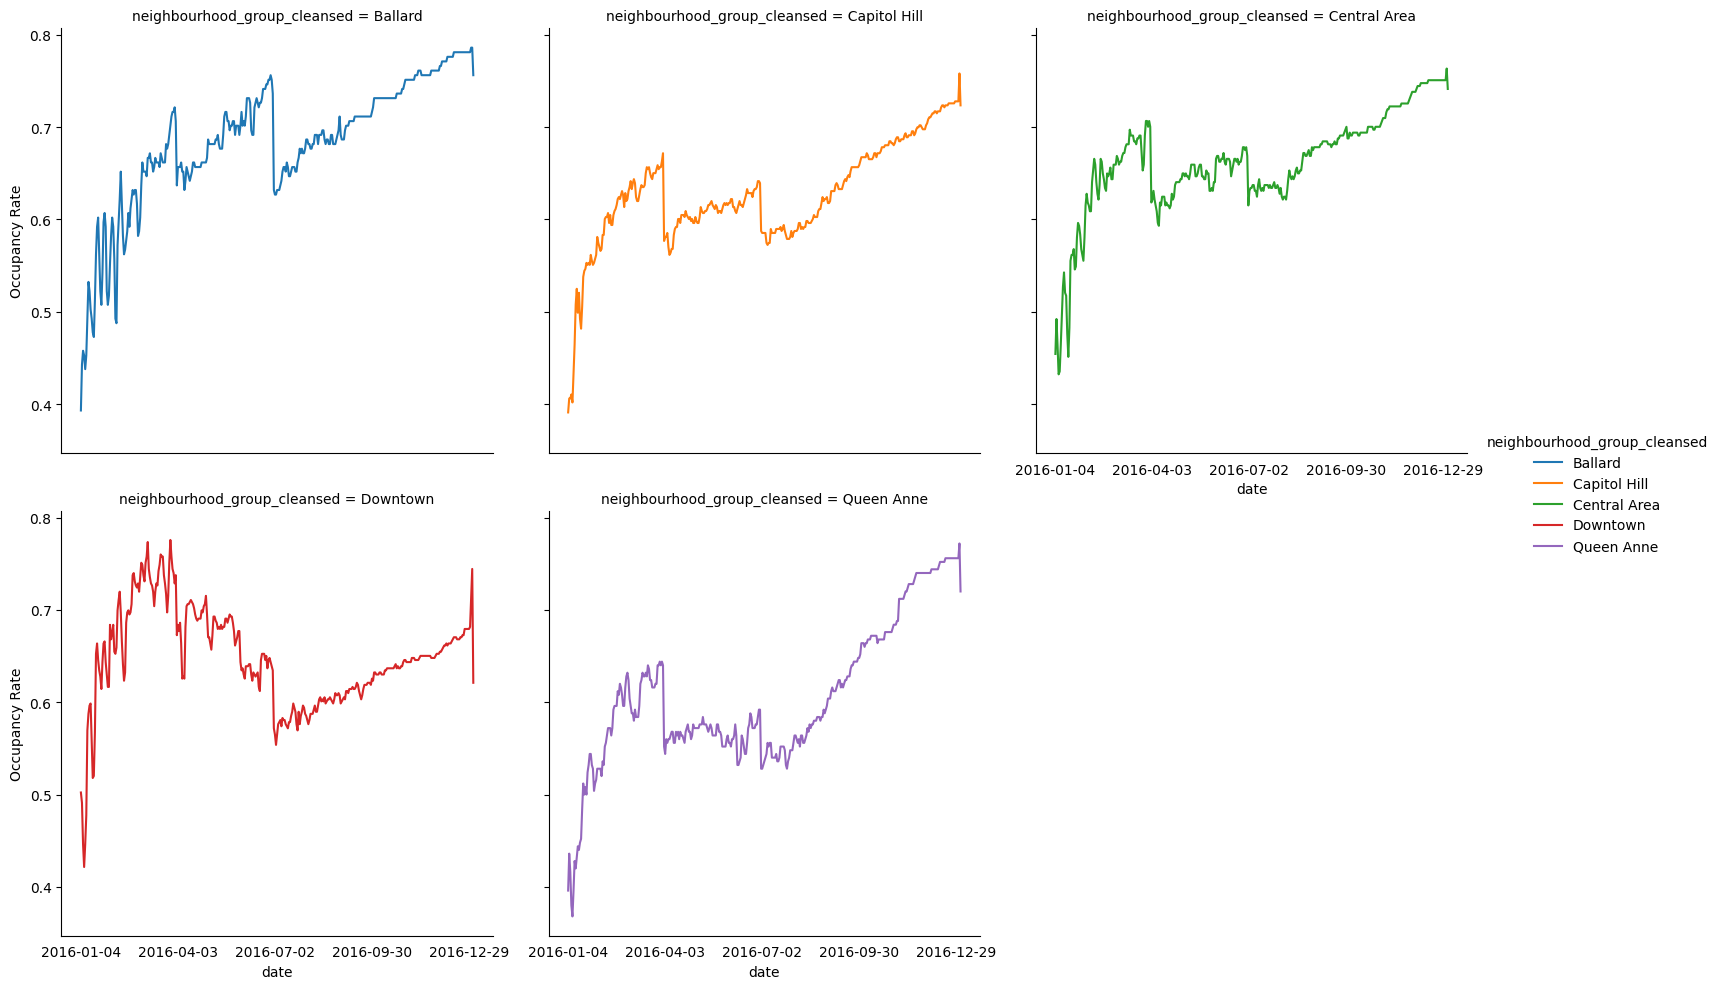

In [127]:
popular_neighborhoods = ['Capitol Hill', 'Downtown', 'Central Area', 'Queen Anne', 'Ballard']
top_5_neighborhoods = calendar[calendar['neighbourhood_group_cleansed'].isin(popular_neighborhoods)] 
top_5_neighborhoods = top_5_neighborhoods.groupby(["date", 'neighbourhood_group_cleansed']).agg({
    "available": "mean"
})

g = sns.relplot(data=top_5_neighborhoods, x="date", y="available", hue="neighbourhood_group_cleansed", kind="line", col="neighbourhood_group_cleansed", col_wrap = 3)
g.set(ylabel="Occupancy Rate")

for ax in g.axes.flat:
    for index,label in enumerate(ax.get_xticklabels()):
        if index % 90 == 0: 
            label.set_visible(True)
        else:
            label.set_visible(False)

g.tick_params(bottom=False)


#### 3. What is the average price for these listings? How do they vary by neighborhood?

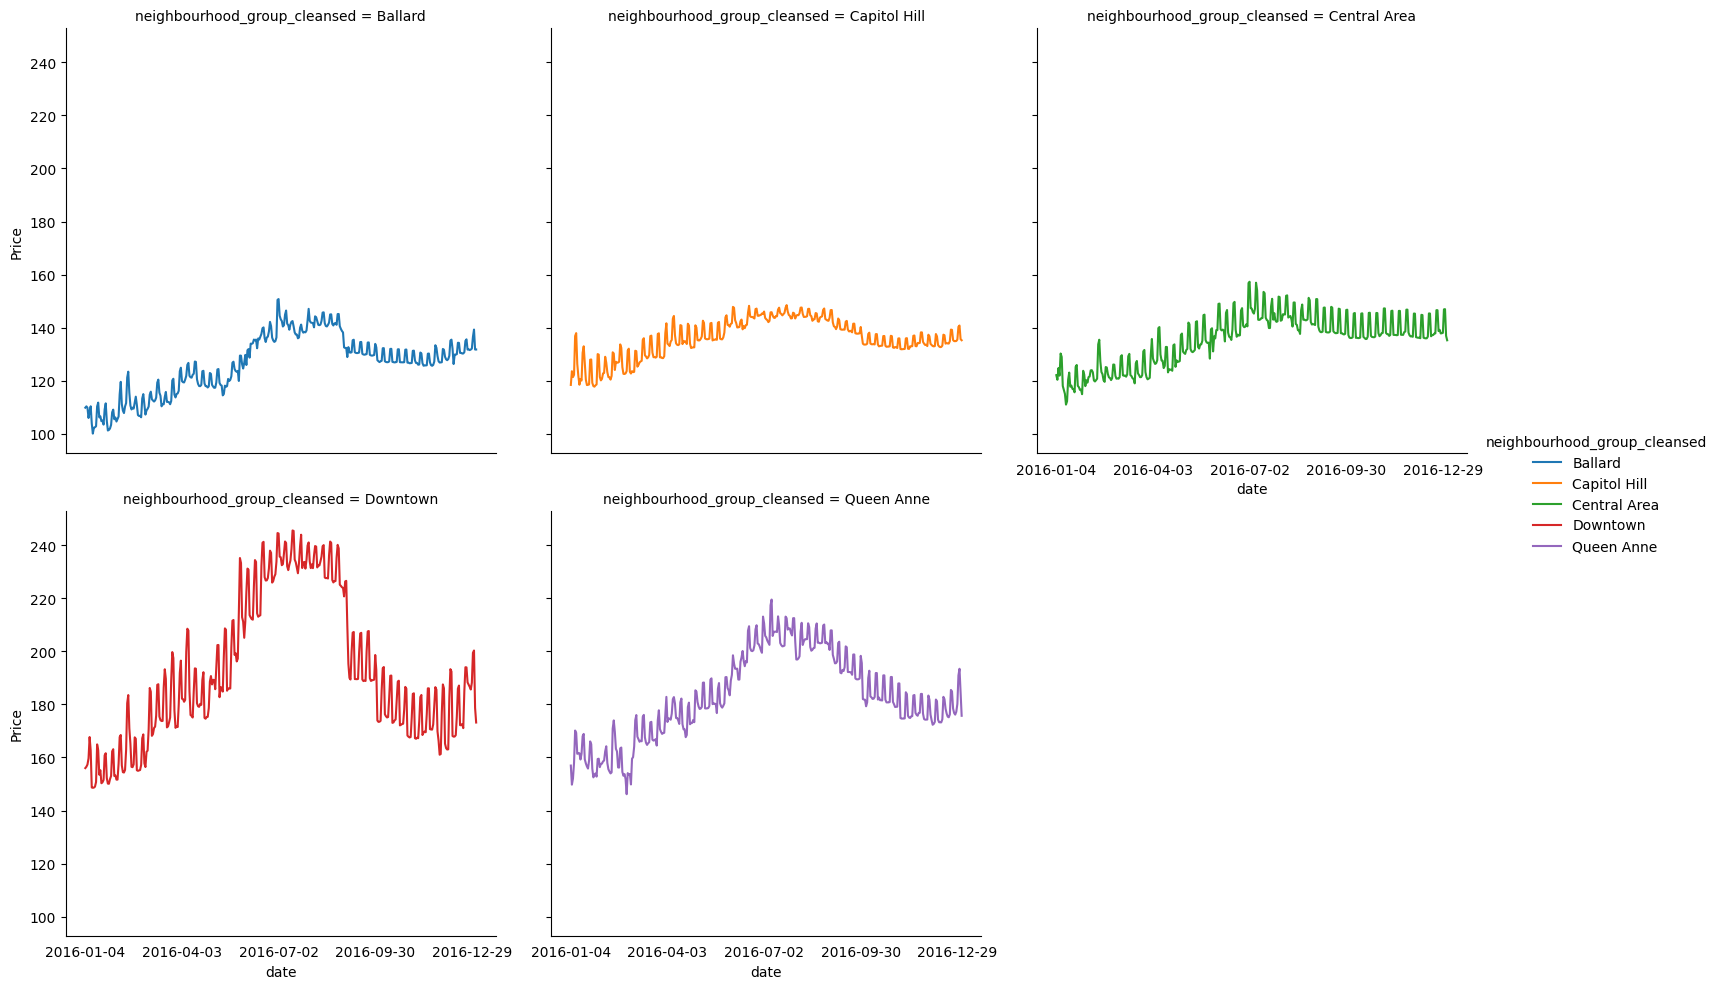

In [129]:
popular_neighborhoods = ['Capitol Hill', 'Downtown', 'Central Area', 'Queen Anne', 'Ballard']
top_5_neighborhoods = calendar[calendar['neighbourhood_group_cleansed'].isin(popular_neighborhoods)] 
top_5_neighborhoods = top_5_neighborhoods.groupby(["date", 'neighbourhood_group_cleansed']).agg({
    "price": "mean"
})

g = sns.relplot(data=top_5_neighborhoods, x="date", y="price", hue="neighbourhood_group_cleansed", kind="line", col="neighbourhood_group_cleansed", col_wrap = 3)
g.set(ylabel="Price")

for ax in g.axes.flat:
    for index,label in enumerate(ax.get_xticklabels()):
        if index % 90 == 0: 
            label.set_visible(True)
        else:
            label.set_visible(False)

g.tick_params(bottom=False)

#### 4. How did travelers rate these listings? 

<AxesSubplot: xlabel='review_scores_rating', ylabel='Percent'>

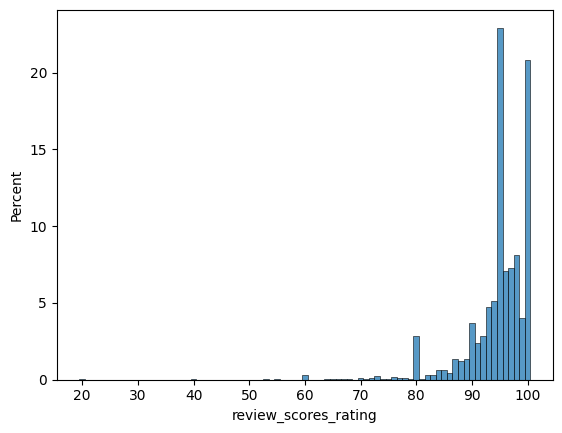

In [34]:
listings_cleaned = listings_cleaned[listings_cleaned["review_scores_rating"].isnull() == False]
sns.histplot(listings_cleaned, x="review_scores_rating", stat="percent", discrete=True) 

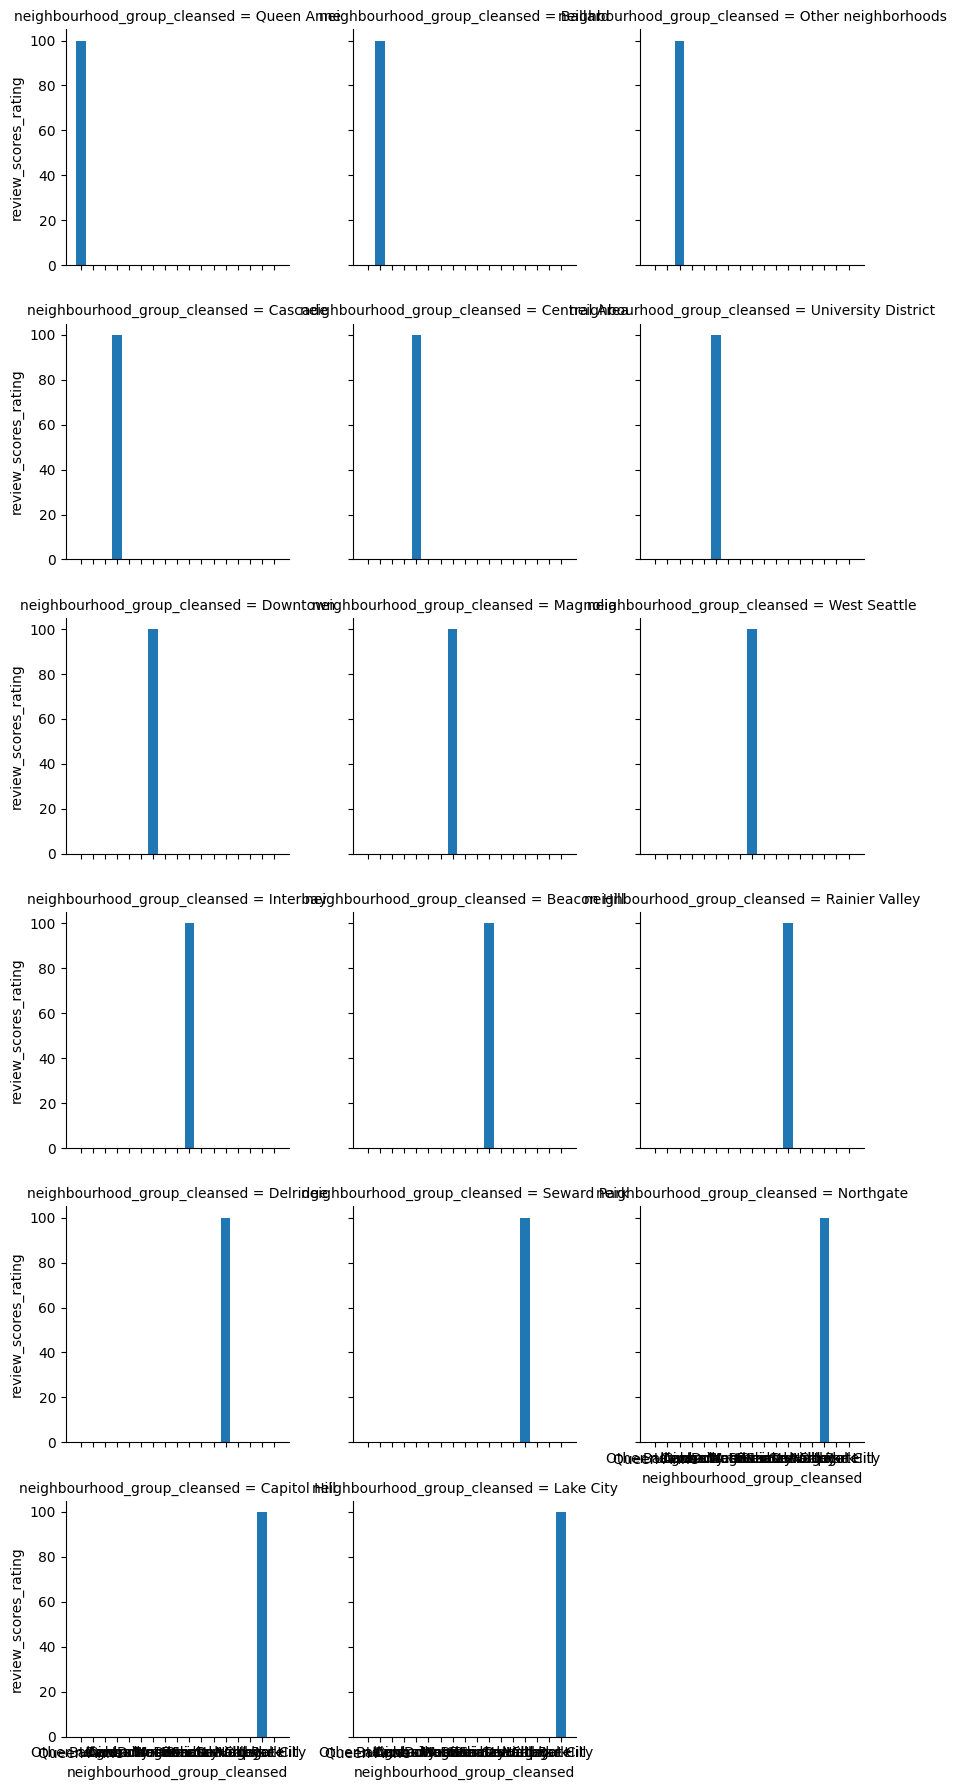

In [115]:
#How much do they vary by neighborhood?
graph = sns.FacetGrid(listings_cleaned, col='neighbourhood_group_cleansed', col_wrap = 3)
graph.map(plt.bar, "neighbourhood_group_cleansed", "review_scores_rating")
plt.show()

<AxesSubplot: xlabel='host_response_time', ylabel='Count'>

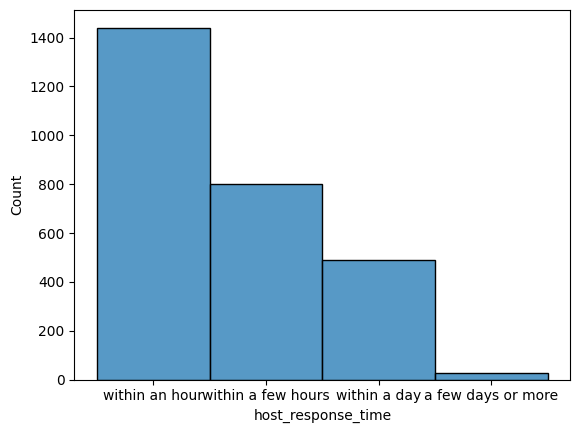

In [36]:
#How quickly are hosts responding to requests
sns.histplot(data=listings_cleaned, x="host_response_time")

**5. Is there a correlation between price and rating?**

[Text(0.5, 1.0, 'Price vs. Rating: Is There a Correlation?'),
 Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Rating')]

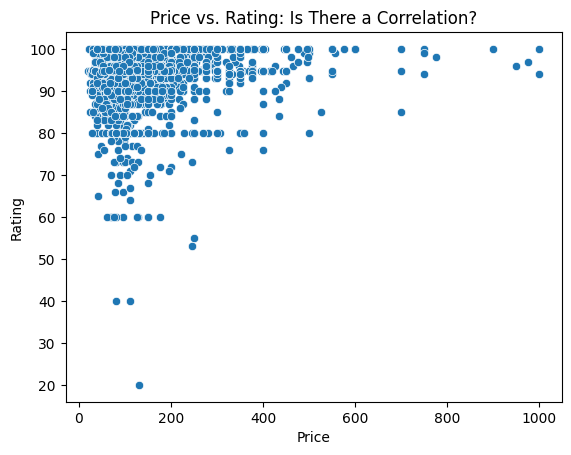

In [71]:
sns.scatterplot(data=listings, x='price', y='review_scores_rating').set(title="Price vs. Rating: Is There a Correlation?", xlabel="Price", ylabel="Rating")

/var/folders/q9/77f72p3s4hj8k2g1q2645smw0000gn/T/ipykernel_3661/3615955674.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(listings.corr(), annot=True)


<AxesSubplot: >

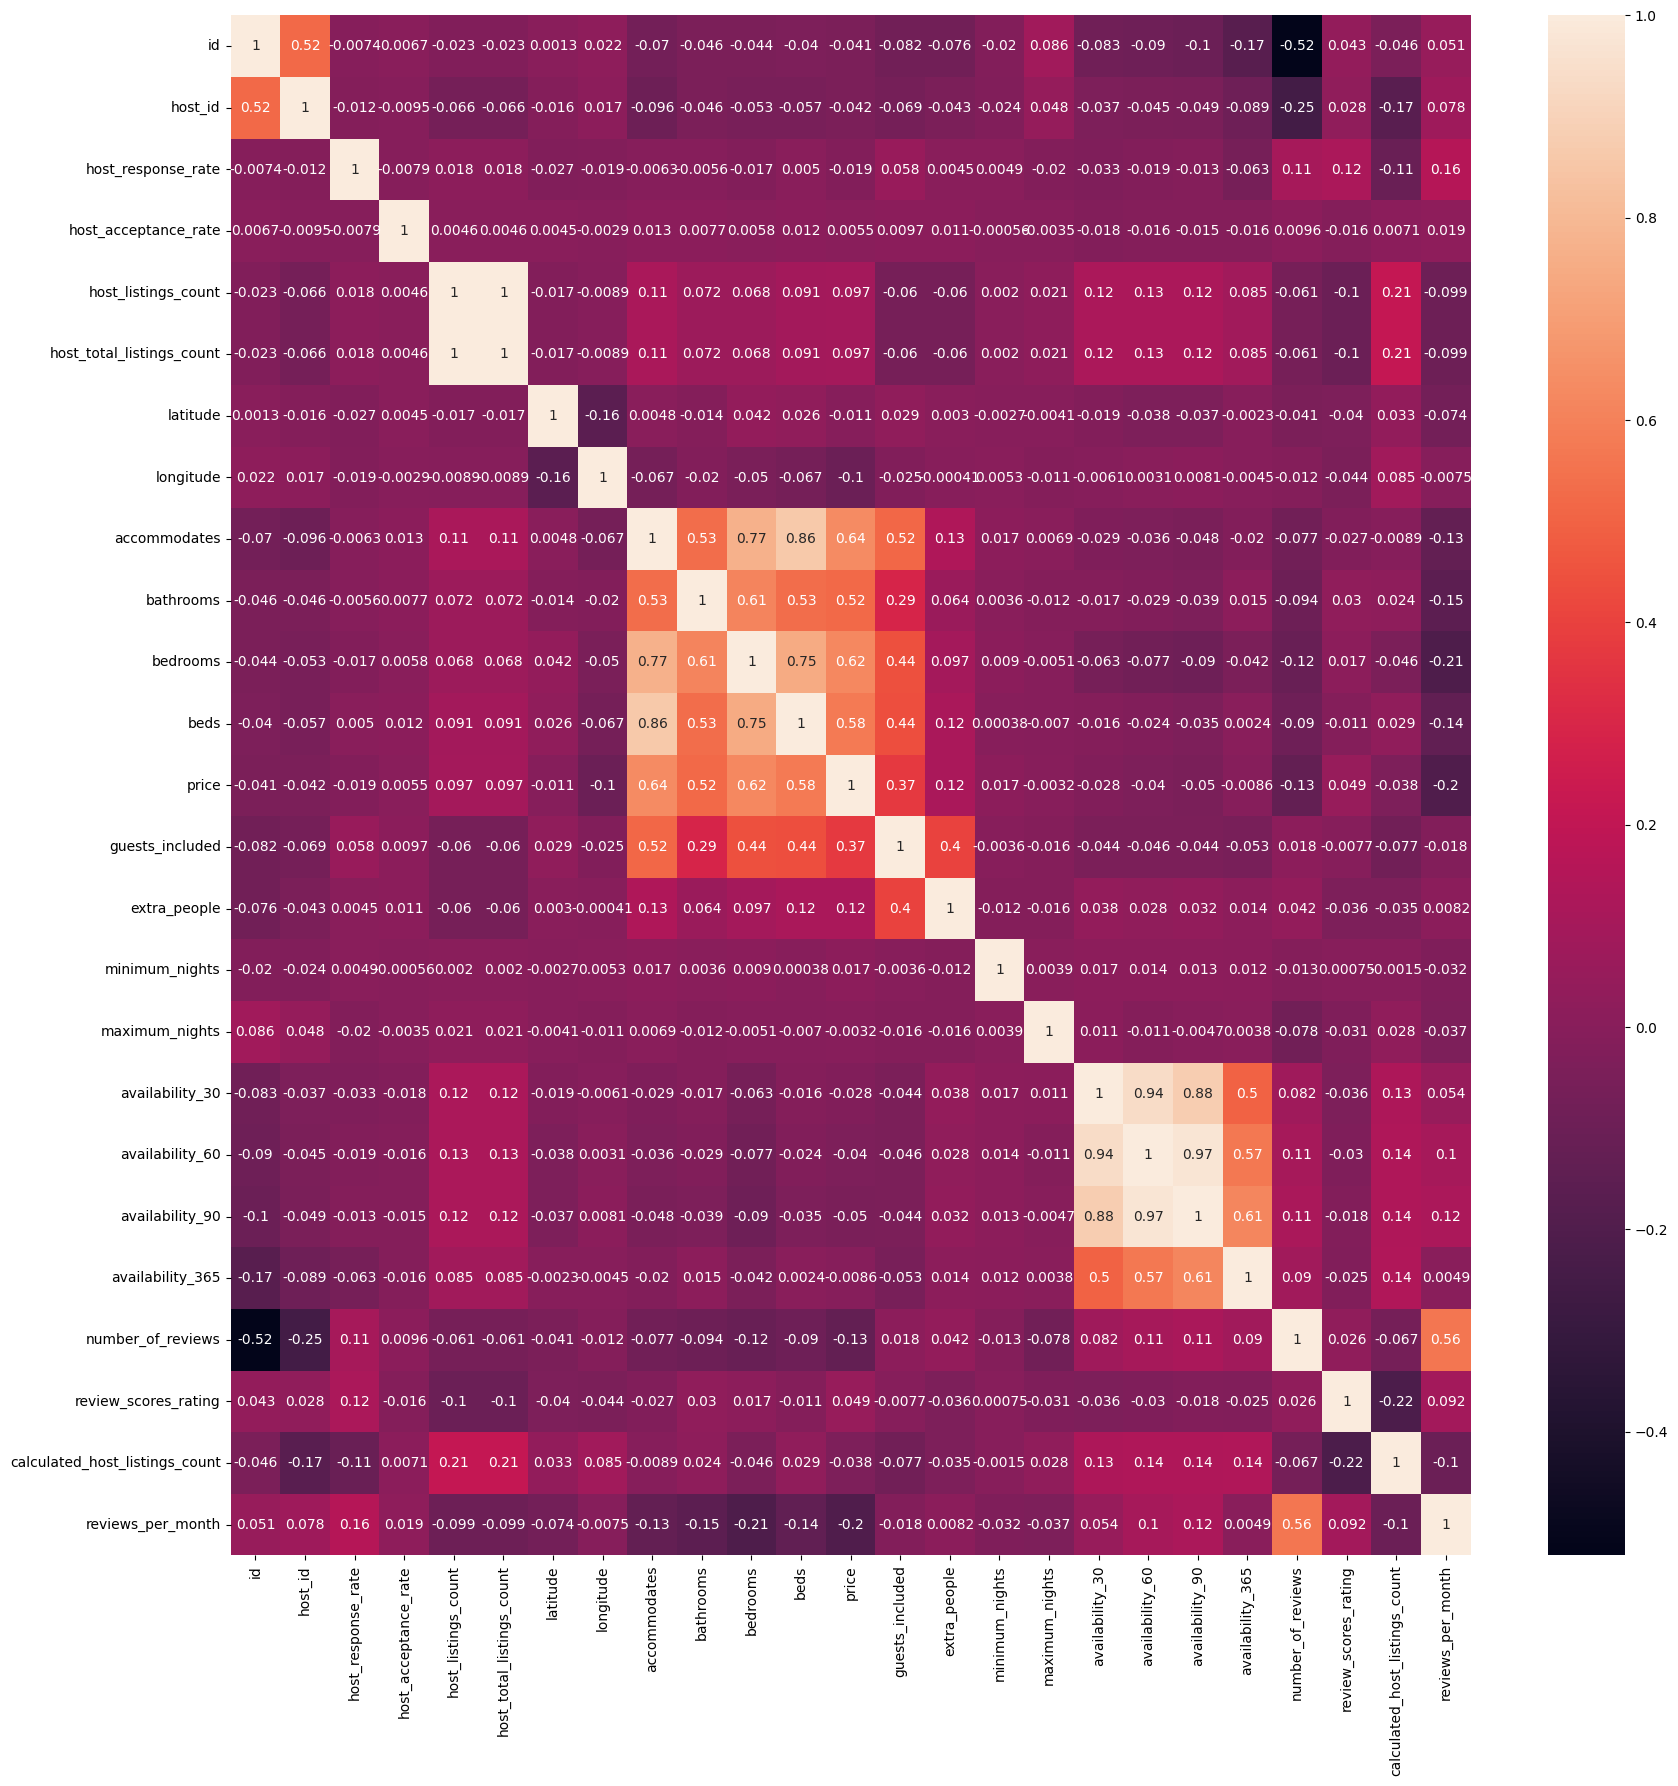

In [58]:
plt.subplots(figsize=(20,20))
sns.heatmap(listings.corr(), annot=True)

## The Model - Random Forest vs. XGBoost

Can we predict the ratings based on listing features? If so, what features are the most important?

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
import spacy

In [69]:
rf = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

In [70]:
#Since we have categorical values, we want to turn these into numerical values
listings_cleaned = pd.get_dummies(listings_cleaned)
#X.shape
X = listings_cleaned.drop('review_scores_rating', axis=1)
y = listings_cleaned['review_scores_rating']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=42)

In [73]:
y_pred = rf.predict(X_test)

In [74]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 3.3439445521594062
Mean Squared Error (MSE): 28.971021452243377
Root Mean Squared Error (RMSE): 5.382473544035621
R^2: 0.10337262807177472
Mean Absolute Percentage Error (MAPE): 3.98
Accuracy: 96.02


### Natural Language Processing - Sentiment Analysis

Another interesting question we might want to answer is can we determine what is a positive, neutral, or negative review? And how do these reviews correlate with a listing's overall rating. Let's use NLP to figure that out!

In [96]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [97]:
sid = SentimentIntensityAnalyzer()

In [99]:
reviews["scores"] = reviews["comments"].apply(lambda comments:sid.polarity_scores(comments))

reviews['compound']  = reviews['scores'].apply(lambda score_dict: score_dict['compound'])

reviews['comp_score'] = reviews['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

reviews.head()

/var/folders/q9/77f72p3s4hj8k2g1q2645smw0000gn/T/ipykernel_96467/3754849095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["scores"] = reviews["comments"].apply(lambda comments:sid.polarity_scores(comments))
/var/folders/q9/77f72p3s4hj8k2g1q2645smw0000gn/T/ipykernel_96467/3754849095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['compound']  = reviews['scores'].apply(lambda score_dict: score_dict['compound'])
/var/folders/q9/77f72p3s4hj8k2g1q2645smw0000gn/T/ipykernel_96467/37548490

,listing_id,id,date,reviewer_id,reviewer_name,comments,scores,compound,comp_score
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.7901,pos
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",0.9872,pos
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...","{'neg': 0.043, 'neu': 0.772, 'pos': 0.185, 'co...",0.8718,pos
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,"{'neg': 0.035, 'neu': 0.765, 'pos': 0.2, 'comp...",0.8313,pos
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,"{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'comp...",0.9783,pos


In [100]:
reviews["comp_score"].value_counts()

pos    83983
neg      848
Name: comp_score, dtype: int64

The overhwhelming majority (99%) of reviews have a positive sentiment. This makes sense, since as we saw earlier, most ratings fall in the 80-100 range.

In [101]:
reviews[reviews["comp_score"] == 'neg']

,listing_id,id,date,reviewer_id,reviewer_name,comments,scores,compound,comp_score
189,3242605,20289302,2014-09-27,19811857,Ivaylo,"Cozy and very private space! Close to beach, s...","{'neg': 0.057, 'neu': 0.943, 'pos': 0.0, 'comp...",-0.3816,neg
404,1205666,19475353,2014-09-13,18033144,Petra,Es war wundervoll bei Sean und seiner Familie....,"{'neg': 0.125, 'neu': 0.875, 'pos': 0.0, 'comp...",-0.9538,neg
458,1205666,44296965,2015-08-25,28611673,Christine,"Sean, Carla & Sohn waren wirklich ganz tolle G...","{'neg': 0.041, 'neu': 0.959, 'pos': 0.0, 'comp...",-0.5994,neg
729,1122236,4818068,2013-05-27,1436712,Sunny,"The apartment was as advertised, 4 blocks to C...","{'neg': 0.109, 'neu': 0.821, 'pos': 0.07, 'com...",-0.1511,neg
823,6567683,43430433,2015-08-19,32701524,Jesus,"Excelente ubicación en la ciudad, el lugar mu...","{'neg': 0.023, 'neu': 0.977, 'pos': 0.0, 'comp...",-0.2960,neg
...,...,...,...,...,...,...,...,...,...
84110,6079131,35572418,2015-06-20,10827848,Meghan,"The Guesthouse was great! It was easy to find,...","{'neg': 0.165, 'neu': 0.661, 'pos': 0.174, 'co...",-0.2081,neg
84121,6079131,46598039,2015-09-12,28649034,Martha Eugenia,"Fue agradable, los anfitriones preparan tu est...","{'neg': 0.047, 'neu': 0.953, 'pos': 0.0, 'comp...",-0.2960,neg
84346,7619060,56681463,2015-12-16,49837679,Shucheng,"Following the last review, however, there are ...","{'neg': 0.087, 'neu': 0.892, 'pos': 0.02, 'com...",-0.8431,neg
84378,4577542,44747593,2015-08-29,25805389,Sebastian,"Die Unterkunft war sehr schön und genau so, wi...","{'neg': 0.309, 'neu': 0.691, 'pos': 0.0, 'comp...",-0.9961,neg


### Topic Modeling

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words = 'english')

In [ ]:
dtm = cv.fit_transform(reviews['comments'].astype('unicode'))

In [ ]:
dtm

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
LDA = LatentDirichletAllocation(n_components=3, random_state=42)

In [ ]:
LDA.fit(dtm)

In [ ]:
len(cv.get_feature_names_out())

In [ ]:
import random

In [ ]:
for i in range(10):
    random_word_id = random.randint(0,31964)
    print(cv.get_feature_names_out()[random_word_id])

In [ ]:
len(LDA.components_)

In [ ]:
single_topic = LDA.components_[0]

In [ ]:
single_topic.argsort()

In [ ]:
single_topic[11983]

In [ ]:
single_topic[26057]

In [ ]:
single_topic.argsort()[-10:]

In [ ]:
top_word_indices = single_topic.argsort()[-10:]

In [ ]:
for index in top_word_indices:
    print(cv.get_feature_names_out()[index])

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

## Results and Recommendations